In [1]:
#ładowanie niezbędnych pakietów
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

In [2]:
# ładowanie danych
konie = pd.read_csv('dane/horse.csv')
konie

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


Dane te oryginalnie udostępniono na stronie: https://archive.ics.uci.edu/ml/datasets/Horse+Colic (pod tym linkiem znajduje się również opis kolumn).
Początkowo znalazłem je na: https://www.kaggle.com/uciml/horse-colic (także: https://www.kaggle.com/yasserh/horse-survival-dataset)

In [3]:
konie.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


# oczyszczanie danych

In [4]:
# wyrzucam kolumnę 'hospital_number'
konie.drop(columns = 'hospital_number', inplace = True)
print('Liczba kolumn w ramce danych mających zawartość typu: object, float lub integer:')
print(konie.dtypes.value_counts())
print('-------')
konie.info()
print('w ramce danych pojawiają się istotne braki danych')

Liczba kolumn w ramce danych mających zawartość typu: object, float lub integer:
object     17
float64     7
int64       3
dtype: int64
-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   rectal_temp            239 non-null    float64
 3   pulse                  275 non-null    float64
 4   respiratory_rate       241 non-null    float64
 5   temp_of_extremities    243 non-null    object 
 6   peripheral_pulse       230 non-null    object 
 7   mucous_membrane        252 non-null    object 
 8   capillary_refill_time  267 non-null    object 
 9   pain                   244 non-null    object 
 10  peristalsis            255 non-null    object 
 11  abdominal_distention   243 non-null    object 
 12  nasogastric_tube  

In [5]:
konie['outcome'].describe()

count       299
unique        3
top       lived
freq        178
Name: outcome, dtype: object

Jak widać w ramce danych istnieje poważny odsetek brakujących danych.
Ponadto 178/299 tj. ok.60% koni przeżyło, co zasadniczo jest stosunkowo dobrą informacją dla koni, gorszą jednakże pod kątem analizy danych.

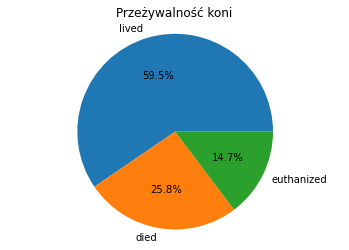

[178, 77, 44]


In [6]:
[lived,died,euthanized] = konie['outcome'].value_counts()
konskiezycie = 'lived' , 'died' , 'euthanized'
plt.pie([lived, died, euthanized], labels = konskiezycie, autopct='%1.1f%%')
plt.title('Przeżywalność koni')
plt.axis('equal')
plt.show()
print([lived,died,euthanized])

Sprawdźmy jak brakujące dane przedstawiają się graficznie:

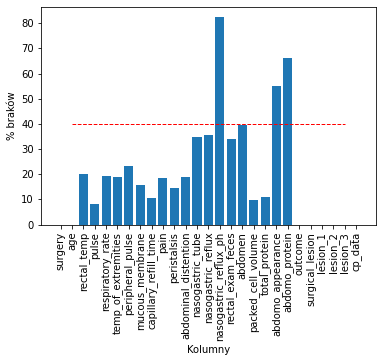

In [7]:
nan_kol = konie.isna().sum()/len(konie)*100
plt.bar(range(len(nan_kol)),nan_kol)
plt.xlabel('Kolumny')
plt.ylabel('% braków')
plt.plot([1, 25], [40,40], 'r--', lw=1)
plt.xticks(list(range(len(konie.columns))),list(konie.columns.values),rotation='vertical')
plt.show()

In [8]:
print('odsetek brakujących danych w kolumnach:')
nan_kol

odsetek brakujących danych w kolumnach:


surgery                   0.000000
age                       0.000000
rectal_temp              20.066890
pulse                     8.026756
respiratory_rate         19.397993
temp_of_extremities      18.729097
peripheral_pulse         23.076923
mucous_membrane          15.719064
capillary_refill_time    10.702341
pain                     18.394649
peristalsis              14.715719
abdominal_distention     18.729097
nasogastric_tube         34.782609
nasogastric_reflux       35.451505
nasogastric_reflux_ph    82.274247
rectal_exam_feces        34.113712
abdomen                  39.464883
packed_cell_volume        9.698997
total_protein            11.036789
abdomo_appearance        55.183946
abdomo_protein           66.220736
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
cp_data                   0.000000
dtype: float64

## one-hot-encoding kolumn lesion

In [9]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(konie[['lesion_1']]).toarray(), columns= enc.get_feature_names(['lesion_1']))
konie.drop(columns = 'lesion_1', inplace = True)
konie_lesion = pd.DataFrame(enc_df)

In [10]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(konie[['lesion_2']]).toarray(), columns= enc.get_feature_names(['lesion_2']))
konie.drop(columns = 'lesion_2', inplace = True)
konie_lesion = konie_lesion.join(enc_df)

In [11]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(konie[['lesion_3']]).toarray(), columns= enc.get_feature_names(['lesion_3']))
konie.drop(columns = 'lesion_3', inplace = True)
konie_lesion = konie_lesion.join(enc_df)
konie_lesion.describe()

,lesion_1_0,lesion_1_300,lesion_1_400,lesion_1_1111,lesion_1_1124,lesion_1_1400,lesion_1_2111,lesion_1_2112,lesion_1_2113,lesion_1_2124,...,lesion_1_31110,lesion_1_41110,lesion_2_0,lesion_2_1400,lesion_2_3111,lesion_2_3112,lesion_2_6112,lesion_2_7111,lesion_3_0,lesion_3_2209
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,...,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.187291,0.003344,0.016722,0.003344,0.003344,0.026756,0.010033,0.016722,0.020067,0.03010,...,0.023411,0.003344,0.976589,0.003344,0.010033,0.003344,0.003344,0.003344,0.996656,0.003344
std,0.390799,0.057831,0.128444,0.057831,0.057831,0.161640,0.099830,0.128444,0.140464,0.17115,...,0.151460,0.057831,0.151460,0.057831,0.099830,0.057831,0.057831,0.057831,0.057831,0.057831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
konie.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,cp_data
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,...,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,no
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,...,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,...,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,...,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,no


In [13]:
obj_columns=[]
nonobj_columns=[]
for col in konie.columns.values:
    if konie[col].dtype=='object':
        obj_columns.append(col)
    else:
        nonobj_columns.append(col)
print(len(obj_columns)," kolumn z danymi kategorycznymi:",'\n',obj_columns,'\n')
print(len(nonobj_columns)," kolumn z danymi wyrażonymi numerycznie:",'\n',nonobj_columns)

konie_obj=konie[obj_columns]
konie_nonobj=konie[nonobj_columns]

17  kolumn z danymi kategorycznymi: 
 ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome', 'surgical_lesion', 'cp_data'] 

7  kolumn z danymi wyrażonymi numerycznie: 
 ['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein']


In [14]:
konie[obj_columns].head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,outcome,surgical_lesion,cp_data
0,no,adult,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,decreased,distend_large,NaN,died,no,no
1,yes,adult,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,absent,other,cloudy,euthanized,no,no
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,normal,normal,NaN,lived,no,yes
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,NaN,serosanguious,died,yes,yes
4,no,adult,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,died,no,no


In [15]:
konie[nonobj_columns].head()

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein
0,38.5,66.0,28.0,NaN,45.0,8.4,NaN
1,39.2,88.0,20.0,NaN,50.0,85.0,2.0
2,38.3,40.0,24.0,NaN,33.0,6.7,NaN
3,39.1,164.0,84.0,5.0,48.0,7.2,5.3
4,37.3,104.0,35.0,NaN,74.0,7.4,NaN


## usunięcie kolumn ze znaczącym odsetkiem (>40%) braków oraz uzupełnienie brakujących rekordów medianą albo modą

In [16]:
# usunięcie braków poprzez wstawienie mody lub mediany, kolumny z ponad 40% braków usunięte w całości

print("Rozmiar liczbowej części ramki danych przed usunięciem wybrakowanych kolumn (próg >40%) : ",konie_nonobj.shape)
for col in konie_nonobj.columns.values:
    if (pd.isna(konie_nonobj[col]).sum())>0:
        if pd.isna(konie_nonobj[col]).sum() > (40/100*len(konie_nonobj)):
            print(col,"- usunięta kolumna")
            konie_nonobj=konie_nonobj.drop([col], axis=1)
        else:
            konie_nonobj[col]=konie_nonobj[col].fillna(konie_nonobj[col].median())
print("Rozmiar liczbowej części ramki danych po usunięciu wybrakowanych kolumn (próg >40%) : ",konie_nonobj.shape)

print("Rozmiar opisowej części ramki danych przed usunięciem wybrakowanych kolumn (próg >40%) : ",konie_obj.shape)
for col in konie_obj.columns.values:
    if (pd.isna(konie_obj[col]).sum())>0:
        if pd.isna(konie_obj[col]).sum() > (40/100*len(konie_obj)):
            print(col,"- usunięta kolumna")
            konie_obj=konie_obj.drop([col], axis=1)
        else:
            konie_obj[col]=konie_obj[col].fillna(konie_obj[col].mode()[0])
print("Rozmiar opisowej części ramki danych po usunięciu wybrakowanych kolumn (próg >40%) : ",konie_obj.shape)

Rozmiar liczbowej części ramki danych przed usunięciem wybrakowanych kolumn (próg >40%) :  (299, 7)
nasogastric_reflux_ph - usunięta kolumna
abdomo_protein - usunięta kolumna
Rozmiar liczbowej części ramki danych po usunięciu wybrakowanych kolumn (próg >40%) :  (299, 5)
Rozmiar opisowej części ramki danych przed usunięciem wybrakowanych kolumn (próg >40%) :  (299, 17)
abdomo_appearance - usunięta kolumna
Rozmiar opisowej części ramki danych po usunięciu wybrakowanych kolumn (próg >40%) :  (299, 16)


# EDA

rectal_temp


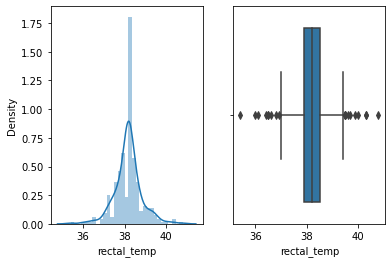

pulse


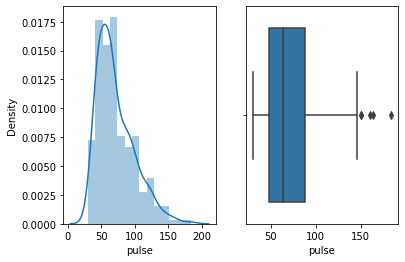

respiratory_rate


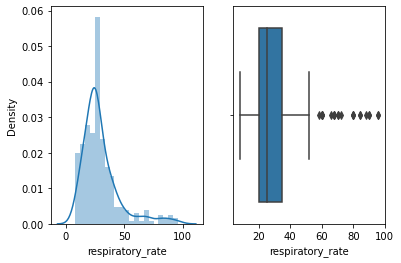

packed_cell_volume


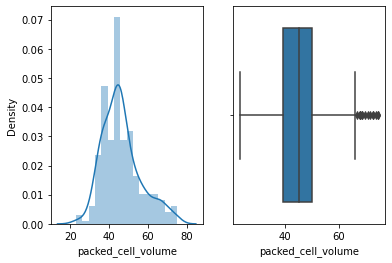

total_protein


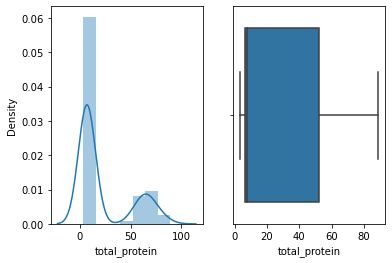

In [17]:
for col in konie_nonobj.columns:
    print(col)
    plt.subplot(1,2,1)
    sns.distplot(konie_nonobj[col])
    plt.subplot(1,2,2)
    sns.boxplot(konie_nonobj[col])
    plt.show()

# badanie korelacji
z wyłączeniem 'lesion' (klasyfikacji urazów) z uwagi na wielość tego typu kolumn po one-hot-encoding

In [18]:
corr_P = konie_nonobj.corr("pearson")
corr_P

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein
rectal_temp,1.000000,0.196641,0.230173,0.058291,-0.049989
pulse,0.196641,1.000000,0.433346,0.369993,-0.083121
respiratory_rate,0.230173,0.433346,1.000000,0.066959,-0.086513
packed_cell_volume,0.058291,0.369993,0.066959,1.000000,-0.052578
total_protein,-0.049989,-0.083121,-0.086513,-0.052578,1.000000


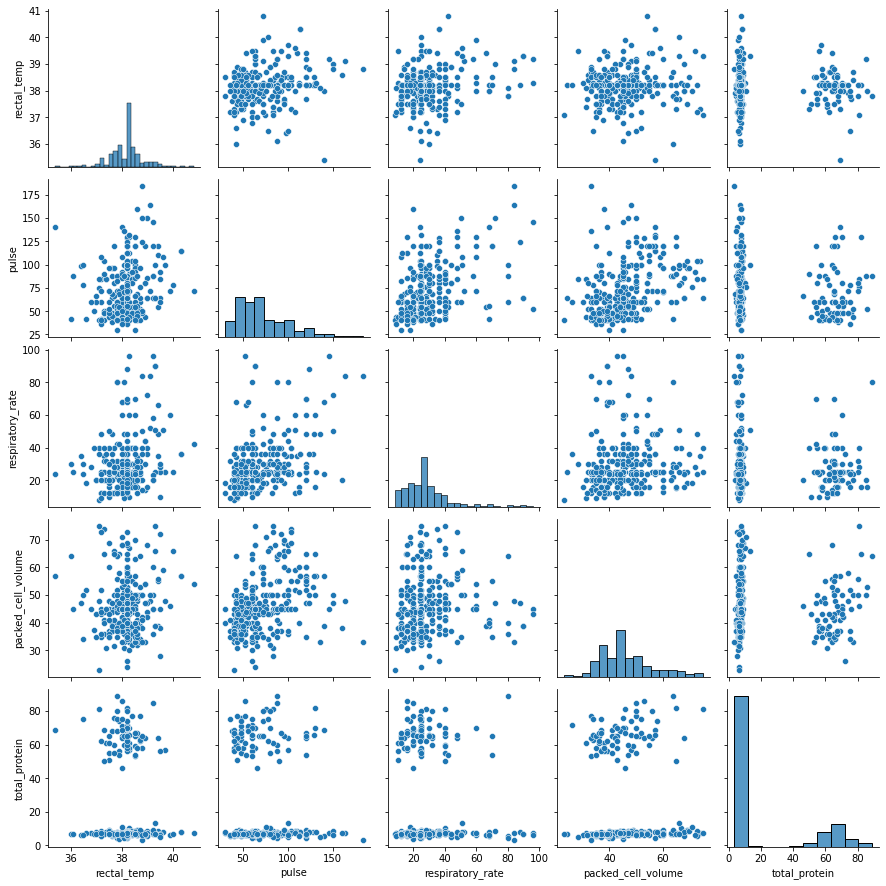

In [19]:
#wizualizacja korelacji przy pomocy seaborn pairplot
sns.pairplot(konie_nonobj)
plt.show()

In [20]:
#tworzymy macierz trójkątną i wyświetlamy wspóczynnik korelacji większy od 0.5
corr_P_tri = corr_P.where(np.triu(np.ones(corr_P.shape, dtype=np.bool_), k=1)).stack().sort_values()
corr_P_tri[abs(corr_P_tri)>0.3]
# TRIU - część macierzy odcięta diagonalą; k=0 z diagonalą; k=1 powyżej diagonali
# WHERE - warunek

pulse  packed_cell_volume    0.369993
       respiratory_rate      0.433346
dtype: float64

In [21]:
# standaryzacja danych numerycznych
# standaryzacja
std = StandardScaler()
konie_nonobj = std.fit_transform(konie_nonobj)
konie_nonobj = pd.DataFrame(konie_nonobj, columns = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein']) # konie[nonobj_columns].columns)
display(konie_nonobj.describe())
konie_nonobj.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein
count,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,8.445864e-15,-3.119021e-17,-5.755337e-17,-1.388707e-16,-6.683617e-18
std,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-4.238110e+00,-1.503457e+00,-1.339757e+00,-2.339848e+00,-7.273291e-01
25%,-4.198778e-01,-8.309378e-01,-5.885384e-01,-7.248095e-01,-6.018166e-01
50%,3.831002e-02,-2.674758e-01,-2.755306e-01,-1.191699e-01,-5.675859e-01
75%,4.964978e-01,6.049815e-01,3.191842e-01,3.855298e-01,1.124932e+00
max,4.009271e+00,4.094811e+00,4.169180e+00,2.909028e+00,2.532194e+00


,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein
0,0.496498,-0.194771,-0.087726,-0.119170,-0.533355
1,1.565603,0.604982,-0.588538,0.385530,2.380057
2,0.191039,-1.139933,-0.338132,-1.330449,-0.598013
3,1.412873,3.367763,3.417962,0.183650,-0.578996
4,-1.336253,1.186620,0.350485,2.808088,-0.571389


In [22]:
# oczyszczona połączona ramka danych
kon_pol = pd.concat([konie_nonobj, konie_obj], axis = 1)
print('rozmiar oczyszczonej ramki danych: ', kon_pol.shape)
kon_pol.head()

rozmiar oczyszczonej ramki danych:  (299, 21)


,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,...,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,outcome,surgical_lesion,cp_data
0,0.496498,-0.194771,-0.087726,-0.119170,-0.533355,no,adult,cool,reduced,normal_pink,...,extreme_pain,absent,severe,slight,none,decreased,distend_large,died,no,no
1,1.565603,0.604982,-0.588538,0.385530,2.380057,yes,adult,cool,normal,pale_cyanotic,...,mild_pain,absent,slight,slight,none,absent,other,euthanized,no,no
2,0.191039,-1.139933,-0.338132,-1.330449,-0.598013,no,adult,normal,normal,pale_pink,...,mild_pain,hypomotile,none,slight,none,normal,normal,lived,no,yes
3,1.412873,3.367763,3.417962,0.183650,-0.578996,yes,young,cold,normal,dark_cyanotic,...,depressed,absent,severe,none,less_1_liter,decreased,distend_large,died,yes,yes
4,-1.336253,1.186620,0.350485,2.808088,-0.571389,no,adult,cool,normal,dark_cyanotic,...,mild_pain,hypomotile,none,slight,none,absent,distend_large,died,no,no


In [23]:
# oczyszczona połączona ramka danych + sprowadzona do wartości numerycznych
konie_obj_copy = konie_obj.copy()
for col in konie_obj.columns.values:
    konie_obj[col] = konie_obj[col].astype('category').cat.codes
kon_polnum = pd.concat([konie_nonobj, konie_obj],axis=1)
print('rozmiar oczyszczonej i sprowadzonej do wartości numerycznych ramki danych: ', kon_polnum.shape)
kon_polnum.head()

rozmiar oczyszczonej i sprowadzonej do wartości numerycznych ramki danych:  (299, 21)


,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,...,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,outcome,surgical_lesion,cp_data
0,0.496498,-0.194771,-0.087726,-0.119170,-0.533355,0,0,1,3,3,...,2,0,2,2,2,1,0,0,0,0
1,1.565603,0.604982,-0.588538,0.385530,2.380057,1,0,1,2,4,...,3,0,3,2,2,0,4,1,0,0
2,0.191039,-1.139933,-0.338132,-1.330449,-0.598013,0,0,2,2,5,...,3,2,1,2,2,3,3,2,0,1
3,1.412873,3.367763,3.417962,0.183650,-0.578996,1,1,0,2,2,...,1,0,2,0,0,1,0,0,1,1
4,-1.336253,1.186620,0.350485,2.808088,-0.571389,0,0,1,2,2,...,3,2,1,2,2,0,0,0,0,0


In [24]:
corr_P = kon_polnum.corr("pearson")
corr_P

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,...,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,outcome,surgical_lesion,cp_data
rectal_temp,1.000000,0.196641,0.230173,0.058291,-0.049989,-0.035324,0.178635,-0.048314,0.011870,-0.148734,...,-0.107848,-0.059814,-0.034244,-0.036897,-0.018967,-0.033734,-0.007921,0.013273,-0.014159,0.057345
pulse,0.196641,1.000000,0.433346,0.369993,-0.083121,0.176001,0.505374,-0.278001,0.247395,-0.052597,...,0.118037,-0.278998,-0.075259,-0.030466,-0.112231,-0.196593,-0.200890,-0.335550,0.253365,0.116661
respiratory_rate,0.230173,0.433346,1.000000,0.066959,-0.086513,0.176980,0.374781,-0.029254,0.127607,-0.085468,...,0.091464,-0.049580,-0.041877,-0.027538,-0.167888,-0.008617,-0.157192,-0.068581,0.199557,-0.048374
packed_cell_volume,0.058291,0.369993,0.066959,1.000000,-0.052578,0.038617,-0.142059,-0.286577,0.243236,-0.132148,...,0.018578,-0.270737,-0.055997,-0.028880,-0.286564,-0.230364,-0.046537,-0.398371,0.164261,0.096570
total_protein,-0.049989,-0.083121,-0.086513,-0.052578,1.000000,0.032262,-0.105550,0.052639,-0.023678,-0.012064,...,-0.108438,-0.133918,-0.019444,-0.051279,0.084213,-0.015367,0.005448,0.265889,-0.124372,-0.411820
surgery,-0.035324,0.176001,0.176980,0.038617,0.032262,1.000000,0.089319,-0.190183,0.115915,0.041470,...,0.228871,-0.061546,-0.150197,0.066982,-0.083910,-0.171611,-0.297202,-0.189222,0.605023,0.005827
age,0.178635,0.505374,0.374781,-0.142059,-0.105550,0.089319,1.000000,-0.014282,0.027843,-0.170800,...,0.058242,0.021008,-0.038430,0.018020,0.085657,0.003506,-0.111078,-0.101782,0.044734,0.079867
temp_of_extremities,-0.048314,-0.278001,-0.029254,-0.286577,0.052639,-0.190183,-0.014282,1.000000,-0.193530,-0.089494,...,-0.188108,0.194146,0.043866,-0.058958,0.077912,0.269007,0.169069,0.290367,-0.226318,-0.052143
peripheral_pulse,0.011870,0.247395,0.127607,0.243236,-0.023678,0.115915,0.027843,-0.193530,1.000000,0.080396,...,0.062531,-0.224845,-0.133792,-0.067478,-0.227529,-0.132625,-0.121833,-0.165719,0.165077,0.066310
mucous_membrane,-0.148734,-0.052597,-0.085468,-0.132148,-0.012064,0.041470,-0.170800,-0.089494,0.080396,1.000000,...,0.154351,-0.173991,-0.007055,0.064263,-0.039029,-0.028594,0.017558,0.056852,0.075724,-0.111756


In [25]:
#tworzymy macierz trójkątną i wyświetlamy wspóczynnik korelacji większy od 0.3
corr_P_tri = corr_P.where(np.triu(np.ones(corr_P.shape, dtype=np.bool_), k=1)).stack().sort_values()
corr_P_tri[abs(corr_P_tri)>0.3]
# TRIU - część macierzy odcięta diagonalą; k=0 z diagonalą; k=1 powyżej diagonali
# WHERE - warunek

total_protein       cp_data                 -0.411820
packed_cell_volume  outcome                 -0.398371
pulse               outcome                 -0.335550
outcome             surgical_lesion         -0.332933
abdomen             surgical_lesion         -0.316903
pulse               packed_cell_volume       0.369993
respiratory_rate    age                      0.374781
pulse               capillary_refill_time    0.379124
                    respiratory_rate         0.433346
packed_cell_volume  capillary_refill_time    0.471559
pulse               age                      0.505374
surgery             surgical_lesion          0.605023
dtype: float64

packed_cell_volume <-> outcome : corr_P =  -0.398371


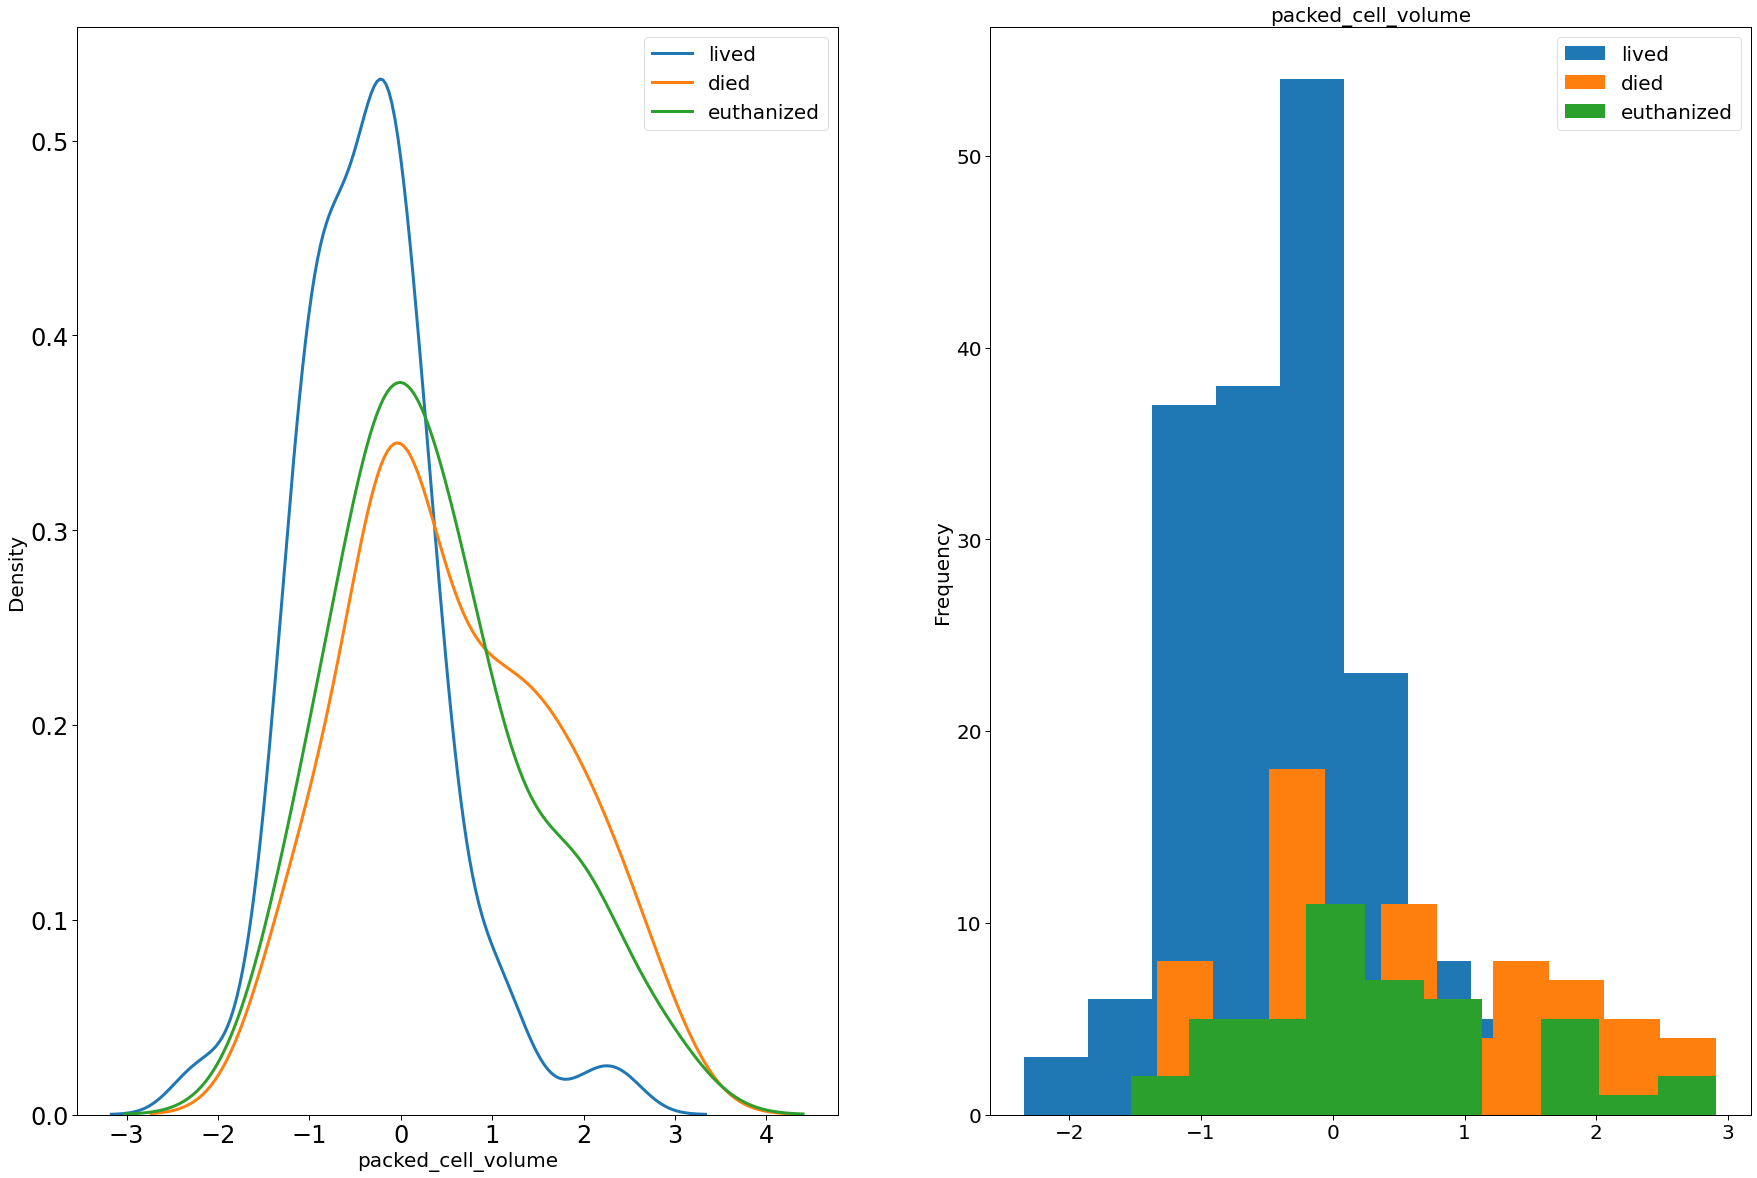

In [26]:
print('packed_cell_volume <-> outcome : corr_P =  -0.398371')

sns.set_context("paper", rc={"font.size":20,'lines.linewidth': 3,"axes.titlesize":20,"axes.labelsize":20, 'axes.labelsize': 'medium', 'xtick.labelsize': 'large', 'ytick.labelsize': 'large',}) 
target=kon_polnum['outcome']
col='packed_cell_volume'
fig,(ax1,ax2)=plt.subplots(1,2, figsize=[30,20])

y=kon_polnum[col][target==2]
x=kon_polnum['outcome'][target==2]
y.plot.hist(ax = ax2, fontsize = 20)
sns.kdeplot(y, ax = ax1)

y=kon_polnum[col][target==0]
x=kon_polnum['outcome'][target==0]
y.plot.hist(ax = ax2, fontsize = 20)
sns.kdeplot(y,ax=ax1)

y=kon_polnum[col][target==1]
x=kon_polnum['outcome'][target==1]
y.plot.hist(ax = ax2, fontsize = 20)
sns.kdeplot(y,ax=ax1)

plt.title(col, fontsize = 20)
ax1.legend(['lived','died','euthanized'], fontsize = 20)
ax2.legend(['lived','died','euthanized'], fontsize = 20)
plt.show()

pulse <-> outcome : corr_P =  -0.398371


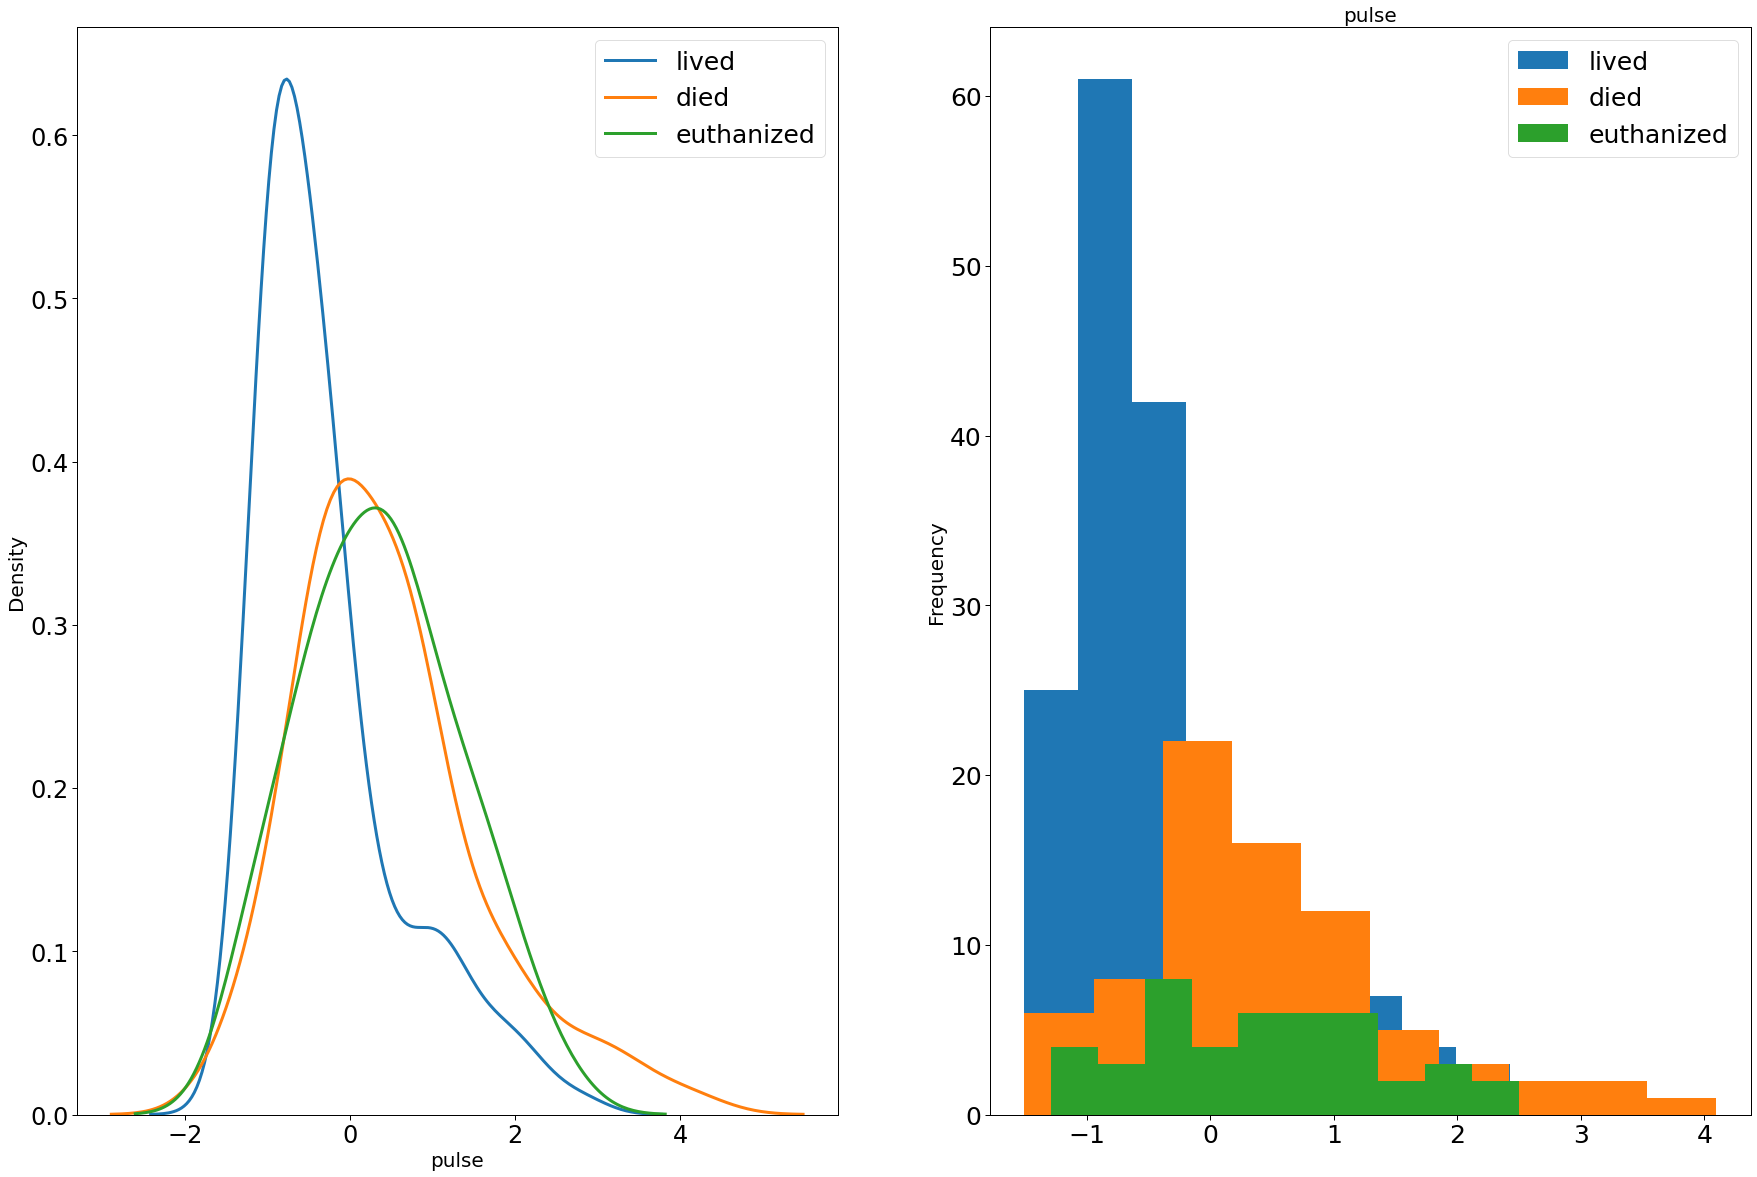

In [27]:
print('pulse <-> outcome : corr_P =  -0.398371')

#sns.set_context("talk")
sns.set_context("paper", rc={"font.size":20,'lines.linewidth': 3,"axes.titlesize":20,"axes.labelsize":20, 'axes.labelsize': 'medium', 'xtick.labelsize': 'large', 'ytick.labelsize': 'large',}) 
target=kon_polnum['outcome']
col='pulse'
fig,(ax1,ax2)=plt.subplots(1,2, figsize=[30,20])

y=kon_polnum[col][target==2]
x=kon_polnum['outcome'][target==2]
y.plot.hist(ax = ax2, fontsize = 25)
sns.kdeplot(y, ax = ax1)

y=kon_polnum[col][target==0]
x=kon_polnum['outcome'][target==0]
y.plot.hist(ax = ax2, fontsize = 25)
sns.kdeplot(y,ax=ax1)

y=kon_polnum[col][target==1]
x=kon_polnum['outcome'][target==1]
y.plot.hist(ax = ax2, fontsize = 25)
sns.kdeplot(y,ax=ax1)

plt.title(col, fontsize = 20)
ax1.legend(['lived','died','euthanized'], fontsize = 25)
ax2.legend(['lived','died','euthanized'], fontsize = 25)
plt.show()

Na obu parach wykresów widoczne jest przesunięcie wykresów 'died' i 'euthanized; względem 'lived'.
Można zaryzykować stwierdzenie, że koń, którego puls wynosi ponad 60 lub 'packed cell volume' ponad 50 ma większe szanse zdechnąć bądż zostać uśpiony niż przeżyć.

### dołączenie kolumn 'lesion' do ramki danych

In [28]:
kon_pol =  kon_pol.join(konie_lesion)
kon_polnum =  kon_polnum.join(konie_lesion)
kon_pol.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,...,lesion_1_31110,lesion_1_41110,lesion_2_0,lesion_2_1400,lesion_2_3111,lesion_2_3112,lesion_2_6112,lesion_2_7111,lesion_3_0,lesion_3_2209
0,0.496498,-0.194771,-0.087726,-0.119170,-0.533355,no,adult,cool,reduced,normal_pink,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.565603,0.604982,-0.588538,0.385530,2.380057,yes,adult,cool,normal,pale_cyanotic,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.191039,-1.139933,-0.338132,-1.330449,-0.598013,no,adult,normal,normal,pale_pink,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.412873,3.367763,3.417962,0.183650,-0.578996,yes,young,cold,normal,dark_cyanotic,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.336253,1.186620,0.350485,2.808088,-0.571389,no,adult,cool,normal,dark_cyanotic,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
print('sprawdzenie tożsamości wymiarów utworzonych ramek: ',kon_polnum.shape, ' == ', kon_pol.shape)
kon_polnum.shape == kon_pol.shape

sprawdzenie tożsamości wymiarów utworzonych ramek:  (299, 90)  ==  (299, 90)


True

# Modele predykcyjne

In [30]:
num_class = kon_polnum['outcome'].value_counts()
print(num_class)

lived_konie = kon_polnum[kon_polnum["outcome"] == 2]
died_konie  = kon_polnum[kon_polnum["outcome"] == 0]
euth_konie  = kon_polnum[kon_polnum["outcome"] == 1]
print(lived_konie.shape)
print(died_konie.shape)
print(euth_konie.shape)

2    178
0     77
1     44
Name: outcome, dtype: int64
(178, 90)
(77, 90)
(44, 90)


### UPsampling - powiększenie i wyrównanie zbioru danych względem zmiennej celu

In [31]:
# zrównoważenie zbioru: _UP-SAMPLING_
from sklearn.utils import resample

died_upsample = resample(died_konie,
             replace=True,
             n_samples=len(lived_konie),
             random_state=42)
euth_upsample = resample(euth_konie,
             replace=True,
             n_samples=len(lived_konie),
             random_state=42)

print('konie, które przeżyły ', lived_konie.shape)
print('konie, które NIE przeżyły ', died_upsample.shape)
print('konie, które uśpiono ', euth_upsample.shape)

rowne_konie = pd.concat([lived_konie, died_upsample, euth_upsample])
print('up-samplingowany zbiór danych: ', rowne_konie.shape)

konie, które przeżyły  (178, 90)
konie, które NIE przeżyły  (178, 90)
konie, które uśpiono  (178, 90)
up-samplingowany zbiór danych:  (534, 90)


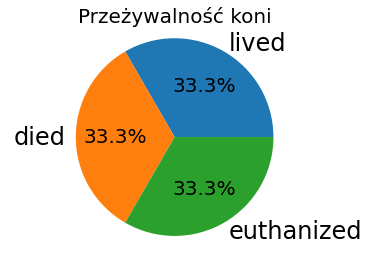

[178, 178, 178]


In [32]:
[lived,died,euthanized] = rowne_konie['outcome'].value_counts()
konskiezycie = 'lived' , 'died' , 'euthanized'
plt.pie([lived, died, euthanized], labels = konskiezycie, autopct='%1.1f%%')
plt.title('Przeżywalność koni')
plt.axis('equal')
plt.show()
print([lived,died,euthanized])

In [33]:
# przygotowania danych do analizy
X = rowne_konie.drop(['outcome'],axis=1)
Y = rowne_konie['outcome']

Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Rozmiar oryginalnych danych: ',X.shape,Y.shape,'\n zestaw treningowy: ',Train_X.shape,Train_Y.shape,'\n zestaw testowy: ', Test_X.shape,'', Test_Y.shape)

Rozmiar oryginalnych danych:  (534, 89) (534,) 
 zestaw treningowy:  (427, 89) (427,) 
 zestaw testowy:  (107, 89)  (107,)


In [34]:
for i in range(5,89):
    X.iloc[:, i] = X.iloc[:, i].astype("category")
display(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 2 to 201
Data columns (total 89 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   rectal_temp            534 non-null    float64 
 1   pulse                  534 non-null    float64 
 2   respiratory_rate       534 non-null    float64 
 3   packed_cell_volume     534 non-null    float64 
 4   total_protein          534 non-null    float64 
 5   surgery                534 non-null    category
 6   age                    534 non-null    category
 7   temp_of_extremities    534 non-null    category
 8   peripheral_pulse       534 non-null    category
 9   mucous_membrane        534 non-null    category
 10  capillary_refill_time  534 non-null    category
 11  pain                   534 non-null    category
 12  peristalsis            534 non-null    category
 13  abdominal_distention   534 non-null    category
 14  nasogastric_tube       534 non-null    cat

None

In [35]:
zestawienie_skutecznosci = pd.DataFrame(np.zeros((7,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
zestawienie_skutecznosci.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']


# definicja funkcji podsumowujących wybrane sposoby analizy
def podsumowanie(pred,pred_prob,i):
    zestawienie_skutecznosci.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    zestawienie_skutecznosci.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100 #
    zestawienie_skutecznosci.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100 #
    zestawienie_skutecznosci.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100 #
    zestawienie_skutecznosci.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob, multi_class='ovr'),3)*100 #[:, 1]
    print('podsumowanie',zestawienie_skutecznosci.index[i])
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #
    print('\n Confusion Matrix:\n',confusion_matrix(Test_Y, pred))
    print('\n Classification Report: \n',classification_report(Test_Y, pred))


## 1. Regresja logistyczna

podsumowanie Logistic Regression (LR)
Accuracy = 73.8%
F1 Score = 73.1%

 Confusion Matrix:
 [[36  4  2]
 [ 4 27  3]
 [ 9  6 16]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.86      0.79        42
           1       0.73      0.79      0.76        34
           2       0.76      0.52      0.62        31

    accuracy                           0.74       107
   macro avg       0.74      0.72      0.72       107
weighted avg       0.74      0.74      0.73       107

intercept  -0.7767826858274955
classes [0 1 2]


,coeff
rectal_temp,-0.065000
pulse,0.059735
respiratory_rate,0.005000
packed_cell_volume,0.433246
total_protein,-1.143585
...,...
lesion_2_3112,-0.010292
lesion_2_6112,-0.001092
lesion_2_7111,-0.001460
lesion_3_0,0.010508


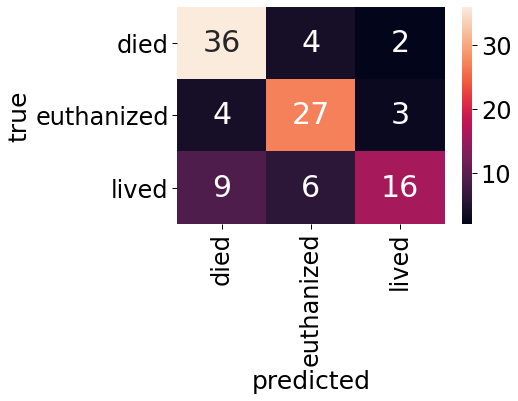

In [36]:
lrmodel = LogisticRegression(solver=  'newton-cg', penalty = 'l2', C = 0.15)

kon_lr = lrmodel.fit(Train_X, Train_Y)
pred = kon_lr.predict(Test_X)
pred_prob = kon_lr.predict_proba(Test_X)
podsumowanie(pred,pred_prob,0)
sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, annot_kws={"size": 30}, xticklabels = ['died' , 'euthanized' , 'lived'], yticklabels = ['died' , 'euthanized' , 'lived'])
plt.xlabel('predicted', fontsize = 25) 
plt.ylabel('true', fontsize = 25)

print('intercept ', kon_lr.intercept_[0])
print('classes', kon_lr.classes_)
display(pd.DataFrame({'coeff': kon_lr.coef_[0]}, index=Train_X.columns))

## 2. Drzewa decyzyjne

podsumowanie Decision Tree Classifier (DT)
Accuracy = 69.19999999999999%
F1 Score = 66.7%

 Confusion Matrix:
 [[34  6  2]
 [ 4 30  0]
 [16  5 10]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.81      0.71        42
           1       0.73      0.88      0.80        34
           2       0.83      0.32      0.47        31

    accuracy                           0.69       107
   macro avg       0.73      0.67      0.66       107
weighted avg       0.72      0.69      0.67       107



Text(17.699999999999996, 0.5, 'true')

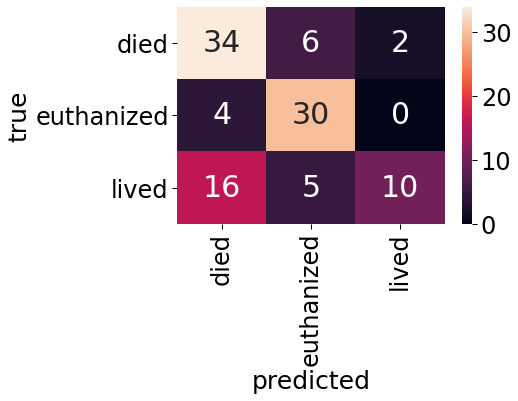

In [37]:
dtmodel = DecisionTreeClassifier(max_depth = 4, criterion = "entropy")

kon_dt = dtmodel.fit(Train_X, Train_Y)
pred = kon_dt.predict(Test_X)
pred_prob = kon_dt.predict_proba(Test_X)
podsumowanie(pred,pred_prob,1)
sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, annot_kws={"size": 30}, xticklabels = ['died' , 'euthanized' , 'lived'], yticklabels = ['died' , 'euthanized' , 'lived'])
plt.xlabel('predicted', fontsize = 25) 
plt.ylabel('true', fontsize = 25)

Drzewo decyzyjne


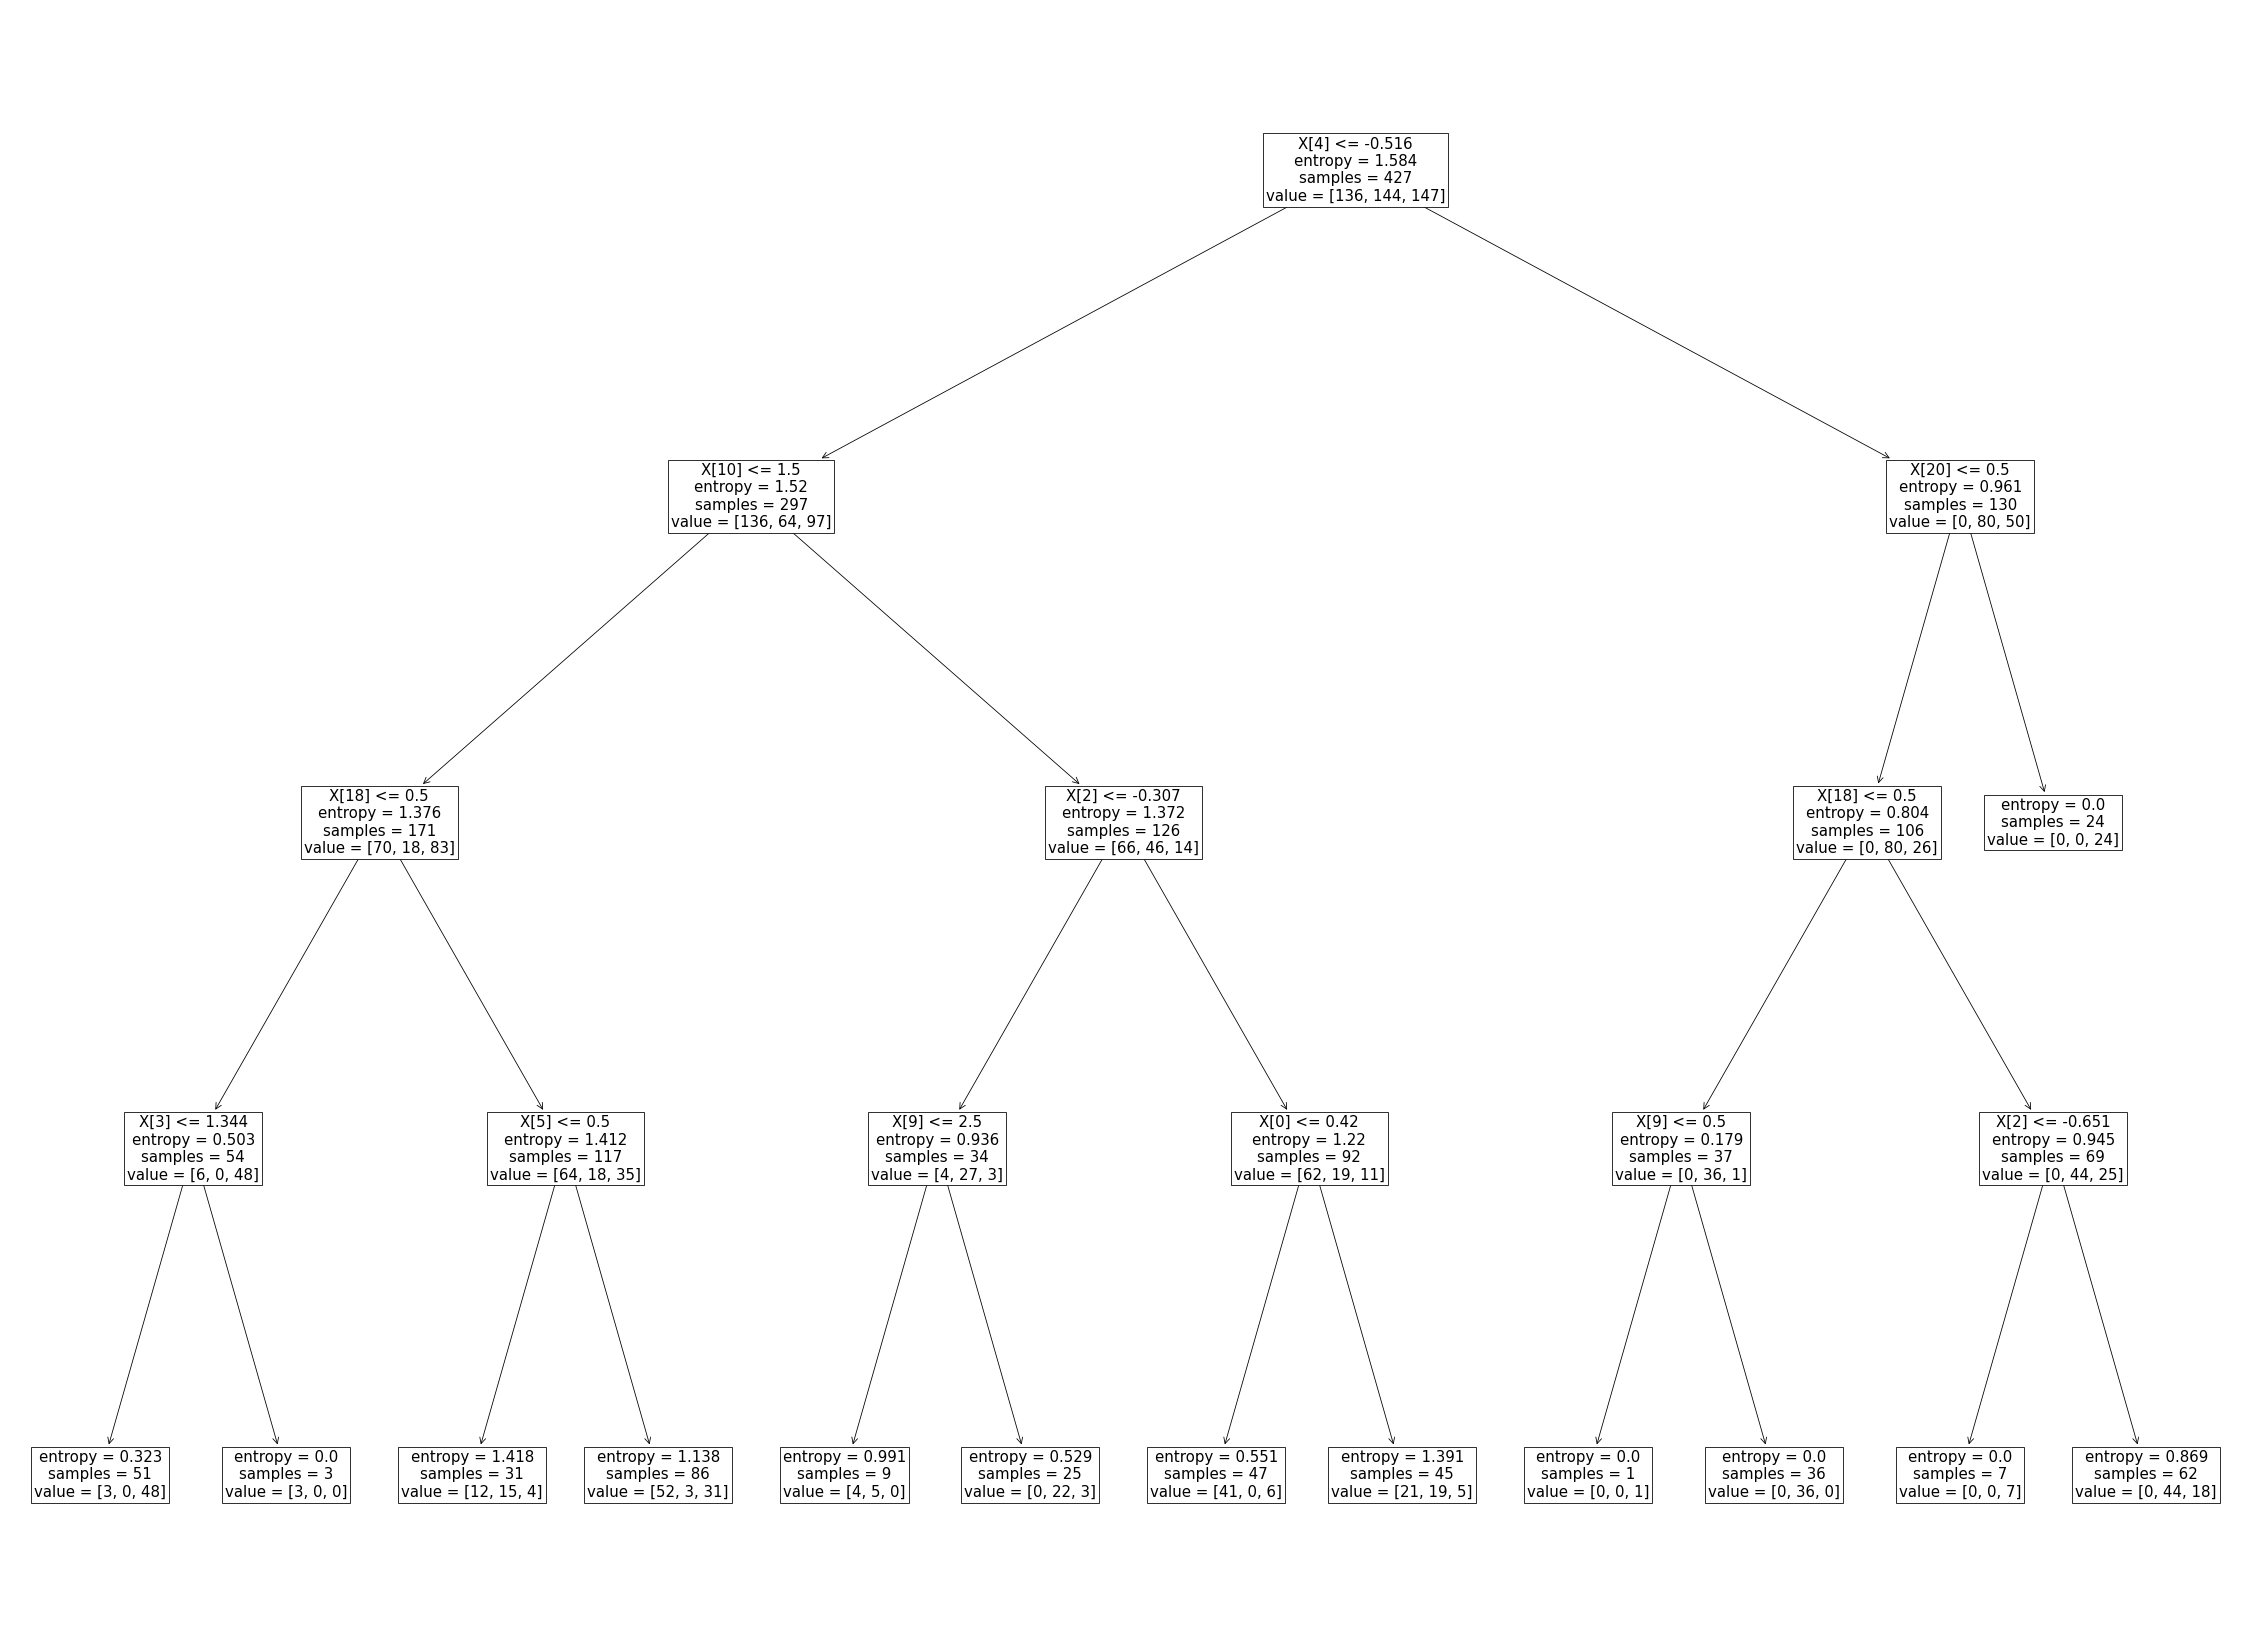

In [38]:
print('Drzewo decyzyjne')
plt.rcParams['figure.figsize'] = [40,30]
tree.plot_tree(kon_dt)
plt.show()

## 3. Las losowy

podsumowanie Random Forest Classifier (RF)
Accuracy = 91.60000000000001%
F1 Score = 91.3%

 Confusion Matrix:
 [[41  0  1]
 [ 0 34  0]
 [ 6  2 23]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92        42
           1       0.94      1.00      0.97        34
           2       0.96      0.74      0.84        31

    accuracy                           0.92       107
   macro avg       0.93      0.91      0.91       107
weighted avg       0.92      0.92      0.91       107



Text(35.699999999999996, 0.5, 'true')

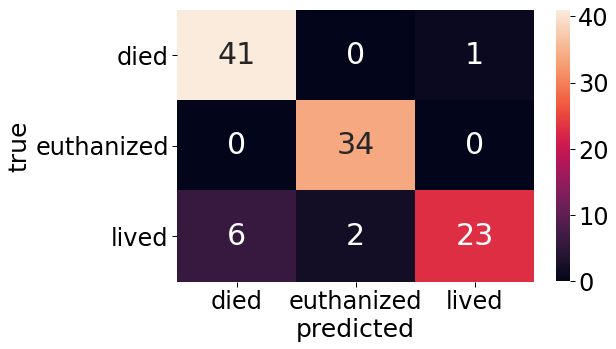

In [39]:
rfmodel = RandomForestClassifier( bootstrap = False, max_depth = 10, min_samples_split = 2)

kon_rf = rfmodel.fit(Train_X, Train_Y)
pred = kon_rf.predict(Test_X)
pred_prob = kon_rf.predict_proba(Test_X)
podsumowanie(pred,pred_prob,2)
plt.rcParams['figure.figsize'] = (8,5)
sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, annot_kws={"size": 30}, xticklabels = ['died' , 'euthanized' , 'lived'], yticklabels = ['died' , 'euthanized' , 'lived'])
plt.xlabel('predicted', fontsize = 25) 
plt.ylabel('true', fontsize = 25)

## 4. Naiwny klasyfikator bayesowski

podsumowanie Naïve Bayes Classifier (NB)
Accuracy = 73.8%
F1 Score = 73.4%

 Confusion Matrix:
 [[35  5  2]
 [ 2 27  5]
 [ 7  7 17]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        42
           1       0.69      0.79      0.74        34
           2       0.71      0.55      0.62        31

    accuracy                           0.74       107
   macro avg       0.73      0.73      0.72       107
weighted avg       0.74      0.74      0.73       107



Text(35.699999999999996, 0.5, 'true')

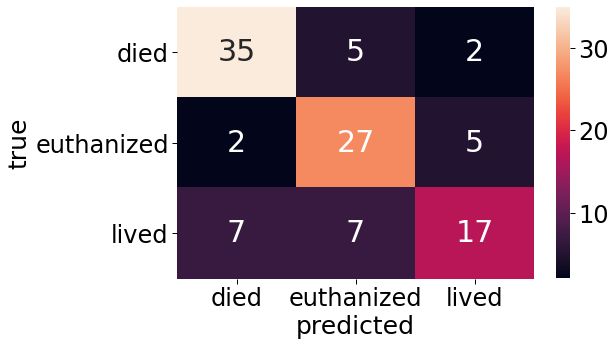

In [40]:
nbmodel = BernoulliNB(alpha = 0)

naiwny_kon = nbmodel.fit(Train_X, Train_Y)
pred = naiwny_kon.predict(Test_X)
pred_prob = naiwny_kon.predict_proba(Test_X)
podsumowanie(pred,pred_prob,3)
sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, annot_kws={"size": 30}, xticklabels = ['died' , 'euthanized' , 'lived'], yticklabels = ['died' , 'euthanized' , 'lived'])
plt.xlabel('predicted', fontsize = 25) 
plt.ylabel('true', fontsize = 25)

## 5. K-najbliższych sąsiadów

podsumowanie K Nearest Neighbours (KNN)
Accuracy = 78.5%
F1 Score = 75.6%

 Confusion Matrix:
 [[39  2  1]
 [ 0 34  0]
 [ 8 12 11]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        42
           1       0.71      1.00      0.83        34
           2       0.92      0.35      0.51        31

    accuracy                           0.79       107
   macro avg       0.82      0.76      0.74       107
weighted avg       0.82      0.79      0.76       107



Text(35.699999999999996, 0.5, 'true')

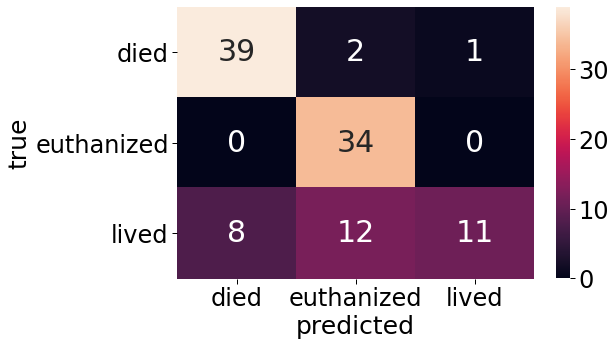

In [41]:
knnmodel = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')

KNN = knnmodel.fit(Train_X, Train_Y)
pred = KNN.predict(Test_X)
pred_prob = KNN.predict_proba(Test_X)
podsumowanie(pred,pred_prob,4)
sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, annot_kws={"size": 30}, xticklabels = ['died' , 'euthanized' , 'lived'], yticklabels = ['died' , 'euthanized' , 'lived'])
plt.xlabel('predicted', fontsize = 25) 
plt.ylabel('true', fontsize = 25)

## 6. Gradient Boosting

podsumowanie Gradient Boosting (GB)
Accuracy = 91.60000000000001%
F1 Score = 91.2%

 Confusion Matrix:
 [[42  0  0]
 [ 0 34  0]
 [ 7  2 22]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        42
           1       0.94      1.00      0.97        34
           2       1.00      0.71      0.83        31

    accuracy                           0.92       107
   macro avg       0.93      0.90      0.91       107
weighted avg       0.93      0.92      0.91       107



Text(35.699999999999996, 0.5, 'true')

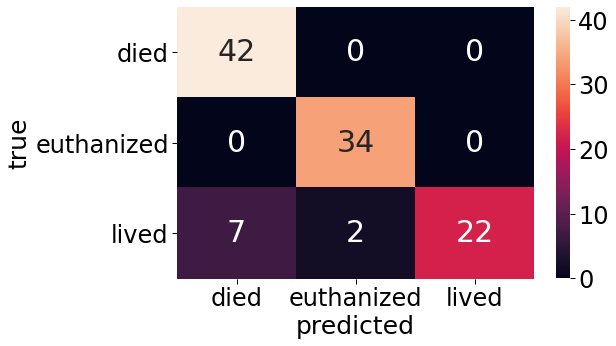

In [42]:
gbmodel = GradientBoostingClassifier(n_estimators = 20, max_depth = 3, learning_rate = 1)
  
kon_GB = gbmodel.fit(Train_X, Train_Y)
pred = kon_GB.predict(Test_X)
pred_prob = kon_GB.predict_proba(Test_X)
podsumowanie(pred,pred_prob,5)
sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, annot_kws={"size": 30}, xticklabels = ['died' , 'euthanized' , 'lived'], yticklabels = ['died' , 'euthanized' , 'lived'])
plt.xlabel('predicted', fontsize = 25) 
plt.ylabel('true', fontsize = 25)

## 7. Extreme Gradient Boosting

podsumowanie Extreme Gradient Boosting (XGB)
Accuracy = 91.60000000000001%
F1 Score = 91.3%

 Confusion Matrix:
 [[41  0  1]
 [ 0 34  0]
 [ 7  1 23]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91        42
           1       0.97      1.00      0.99        34
           2       0.96      0.74      0.84        31

    accuracy                           0.92       107
   macro avg       0.93      0.91      0.91       107
weighted avg       0.92      0.92      0.91       107



Text(35.699999999999996, 0.5, 'true')

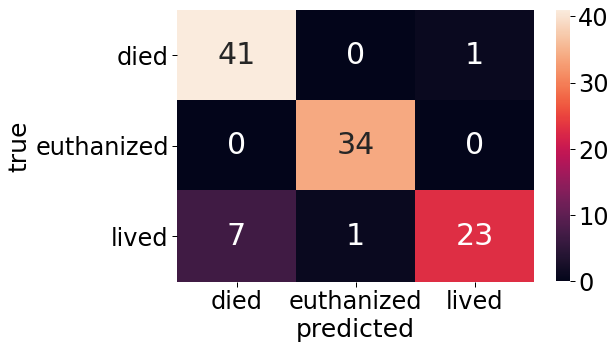

In [43]:
xgbmodel = XGBClassifier(learning_rate = 0.4)

x_kon = xgbmodel.fit(Train_X, Train_Y, eval_metric='logloss')
pred = x_kon.predict(Test_X)
pred_prob = x_kon.predict_proba(Test_X)
podsumowanie(pred,pred_prob,6)
sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, annot_kws={"size": 30}, xticklabels = ['died' , 'euthanized' , 'lived'], yticklabels = ['died' , 'euthanized' , 'lived'])
plt.xlabel('predicted', fontsize = 25) 
plt.ylabel('true', fontsize = 25)

In [44]:
zestawienie_skutecznosci

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),73.8,74.1,73.8,73.1,88.2
Decision Tree Classifier (DT),69.2,72.1,69.2,66.7,86.6
Random Forest Classifier (RF),91.6,92.0,91.6,91.3,99.6
Naïve Bayes Classifier (NB),73.8,73.7,73.8,73.4,87.8
K Nearest Neighbours (KNN),78.5,81.6,78.5,75.6,95.8
Gradient Boosting (GB),91.6,92.6,91.6,91.2,98.2
Extreme Gradient Boosting (XGB),91.6,92.2,91.6,91.3,99.5
